<a href="https://colab.research.google.com/github/Krishna1378/Prodigy_ml_task1/blob/main/prodigy_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
print(train_data.head())
print(train_data.info())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

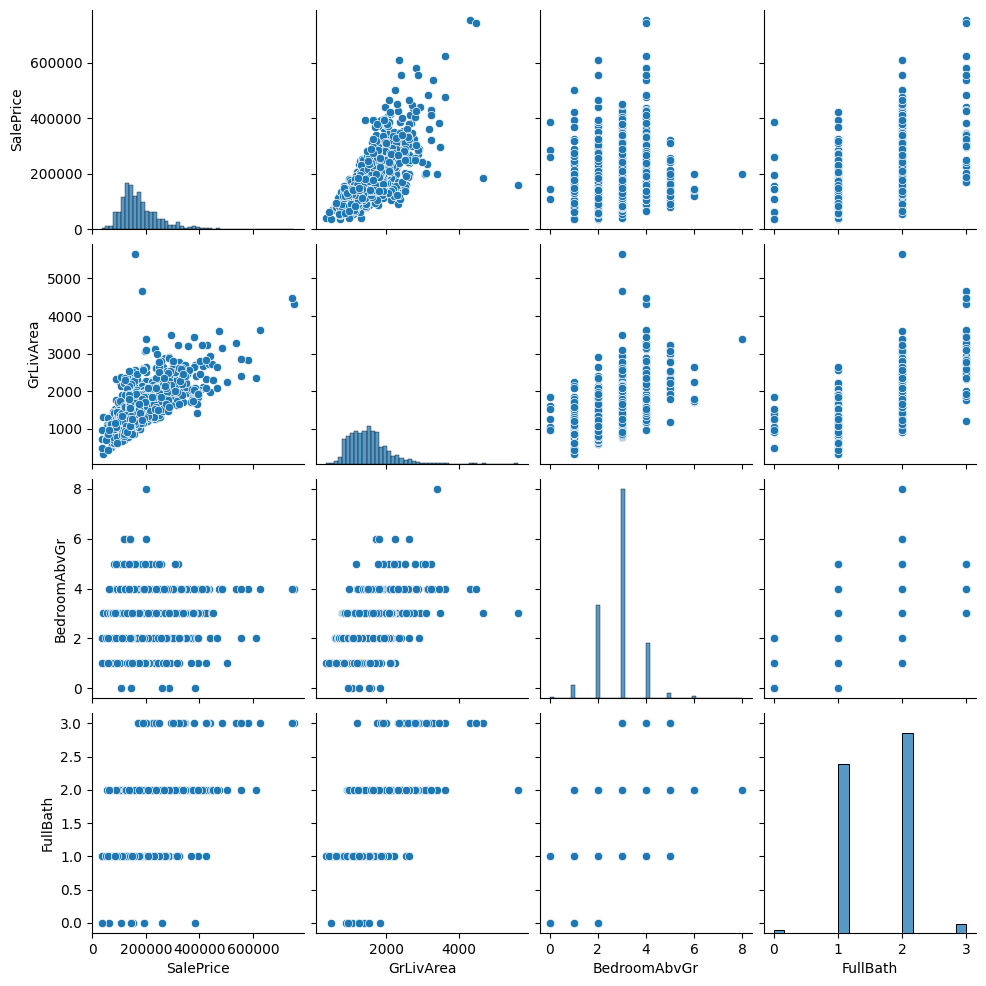

In [4]:
import seaborn as sns
sns.pairplot(train_data[['SalePrice', 'GrLivArea', 'BedroomAbvGr', 'FullBath']])
plt.show()

In [5]:
X_train = train_data[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y_train = train_data['SalePrice']

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
print("Training MSE:", mse_train)
print("Training R-squared:", r2_train)

Training MSE: 2628535155.618378
Training R-squared: 0.5832212987566321


In [8]:
X_test = test_data[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y_test_pred = model.predict(X_test)

In [9]:
submission_df = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': y_test_pred})
submission_df.to_csv('sample_submission.csv', index=False)